<a href="https://colab.research.google.com/github/supriantositompul/Exercise-Startup-Campus/blob/main/Exercise_Module_2_DS_Batch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [49]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv'])) 
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv'])) 

In [50]:
data.head() #Melihat isi data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [51]:
study_data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


<AxesSubplot:>

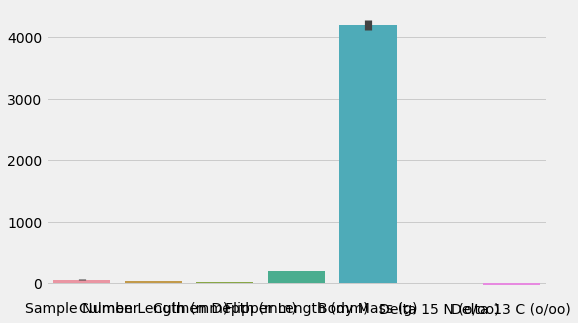

In [52]:
sns.barplot(data=study_data)

Memanggil tabel data

In [27]:
data #new data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
print(data.head()) #Melihat gambaran awal data

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [ ]:
penguin = data
statdes = penguin.describe(include="all")
print(statdes)

       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      342     342        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
top     Adelie  Biscoe               NaN              NaN                NaN   
freq       151     167               NaN              NaN                NaN   
mean       NaN     NaN         43.921930        17.151170         200.915205   
std        NaN     NaN          5.459584         1.974793          14.061714   
min        NaN     NaN         32.100000        13.100000         172.000000   
25%        NaN     NaN         39.225000        15.600000         190.000000   
50%        NaN     NaN         44.450000        17.300000         197.000000   
75%        NaN     NaN         48.500000        18.700000         213.000000   
max        NaN     NaN         59.600000        21.500000         231.000000   

        body_mass_g   sex  
count    34

In [ ]:
data.describe() #Melihat statistik deskriptif

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
#Melihat statistik deskriptif dari kolom categori
penguin = data
statdes = penguin.describe(include="object")
print(statdes)

       species  island   sex
count      344     344   334
unique       3       3     3
top     Adelie  Biscoe  MALE
freq       152     168   168


**Insight**

Berapa rata - rata body mass penguin? 4201.754386

##**Handling Missing Values**

Cek jumlah missing value!

In [6]:
#input your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64


Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [7]:
#input your code here
data.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)


#Parameter inplace=True memastikan bahwa perubahan dilakukan pada DataFrame asli.Setelah menjalankan kode ini, setiap baris yang memiliki nilai yang hilang di kolom yang ditentukan akan dihapus dari DataFrame.

Mengisi missing value pada sex dengan modus!

In [9]:
#input your code here
mode_value = data['sex'].mode()[0] # Untuk mendapatkan nilai pada kolom 'sex'
data['sex'].fillna(mode_value, inplace=True)# Isi nilai yang hilang dengan nilai mode

print(mode_value)

MALE


Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [10]:
#input your code here
data.drop(data[data['sex'] == '.'].index, inplace=True)

Cek kembali apakah masih ada missing value!

In [11]:
#input your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            341 non-null    object 
 1   island             341 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                341 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.3+ KB


In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


***
**Insight**
***
Apakah masih terdapat missing value? Tidak

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64


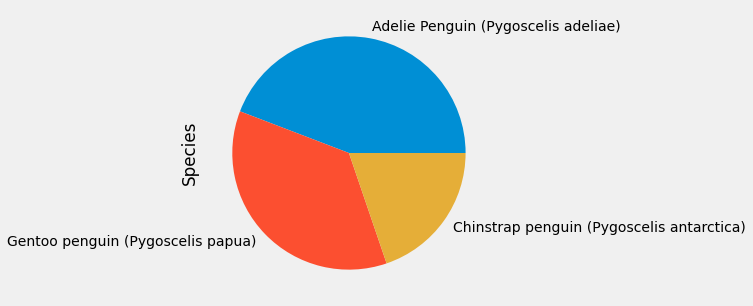

In [55]:
#input your code here 
species_counts = study_data['Species'].value_counts()
species_counts.plot(kind='pie')
print(species_counts)

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak? Adelie Penguin (Pygoscelis adeliae) dengan jumlah 152

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

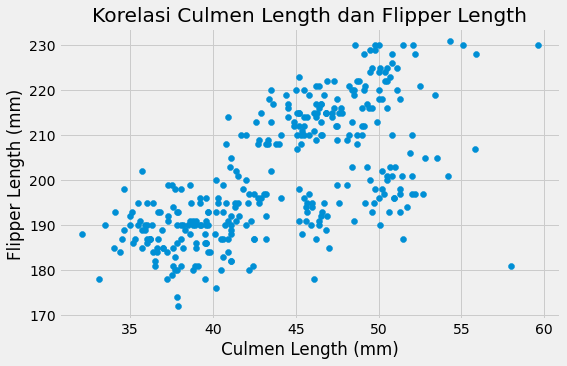

In [62]:
#input your code here
plt.scatter(data['culmen_length_mm'], data['flipper_length_mm'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Korelasi Culmen Length dan Flipper Length')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

In [67]:
#berikut penjelasan dari korelasinya
korelasi = data['culmen_length_mm'], data['flipper_length_mm']
print('Korelasi  antara culmen_length dan flipper_length adalah', korelasi)

Korelasi  antara culmen_length dan flipper_length adalah (0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: culmen_length_mm, Length: 344, dtype: float64, 0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64)


Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

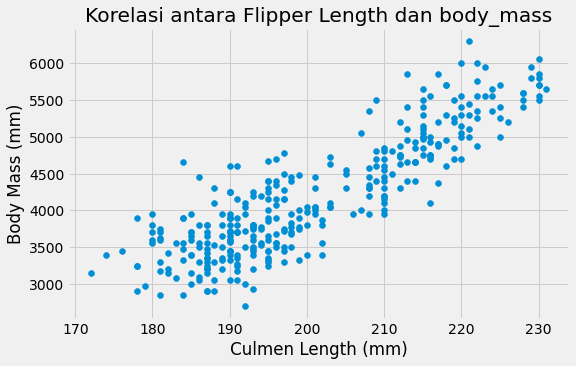

In [70]:
#input your code here
plt.scatter(data['flipper_length_mm'], data['body_mass_g'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (mm)')
plt.title('Korelasi antara Flipper Length dan body_mass')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

In [81]:
#berikut penjelasan dari korelasinya
korelasi = data['flipper_length_mm'], data['body_mass_g']
print('korelasi antara flipper_length dan body_mass adalah ',korelasi)

korelasi antara flipper_length dan body_mass adalah  (0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64, 0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64)


Tampilkan pairplot dari semua variabel!

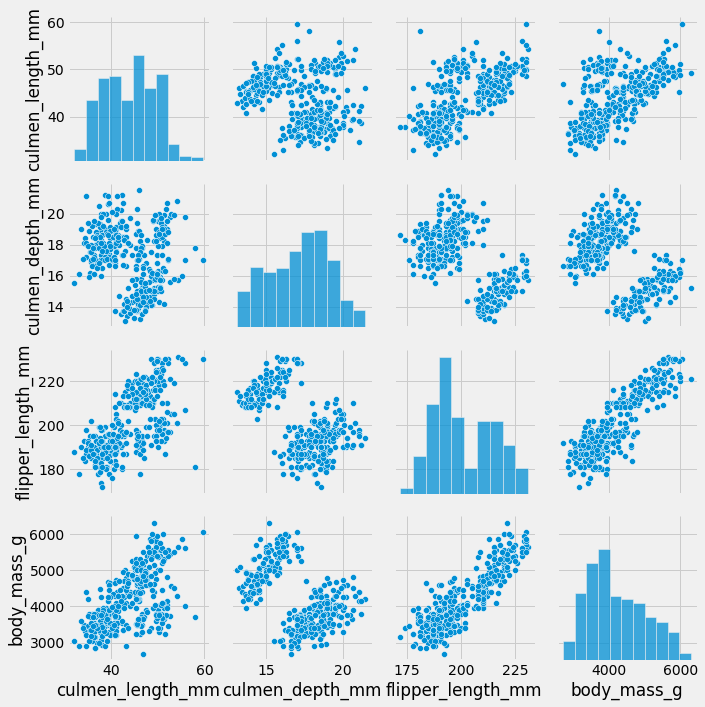

In [82]:
#input your code here
sns.pairplot(data)

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas? 

Dari pairplot yang ditampilkan, terdapat beberapa kesimpulan yang dapat diambil mengenai hubungan antar variabel pada data pinguin:

Terdapat perbedaan ukuran tubuh yang cukup signifikan antara jenis pinguin Adelie dengan jenis pinguin Gentoo dan Chinstrap.
Terdapat korelasi yang cukup kuat antara culmen_length_mm dan flipper_length_mm, yang menunjukkan semakin panjang culmen (paruh) seekor pinguin, maka cenderung semakin panjang juga flipper (sirip) pinguin tersebut.
Terdapat beberapa outlier pada beberapa variabel, seperti body_mass_g dan bill_depth_mm pada jenis pinguin Gentoo.
Terdapat beberapa distribusi variabel yang miring, seperti body_mass_g dan culmen_length_mm, yang menunjukkan adanya perbedaan ukuran tubuh yang cukup signifikan pada jenis pinguin tertentu.
Terdapat juga beberapa hubungan antara pasangan variabel yang tidak terlalu signifikan, seperti body_mass_g dan culmen_depth_mm, flipper_length_mm dan body_mass_g, atau culmen_length_mm dan body_mass_g.